Import The Dependencies


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
car_dataset = pd.read_csv('car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
#Total no. of Rows and Columns
car_dataset.shape#shape is NOT a method it is an attribute
#it returns a python tuple with no. of rows and columns

(301, 9)

In [7]:
print("Number of Rows : ",car_dataset.shape[0])
print("Number of Columns : ",car_dataset.shape[1])

Number of Rows :  301
Number of Columns :  9


INFORMATION OF DATA SET


In [8]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#Missing Values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
import datetime

In [13]:
date_time=datetime.datetime.now()

In [14]:
print(date_time)

2024-05-07 16:39:20.903056


In [15]:
date_time.year

2024

In [16]:
car_dataset['Age'] = date_time.year - car_dataset['Year']

In [17]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [18]:
car_dataset.drop('Year',axis=1,inplace=True)

In [19]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


OUTLIER REMOVER


<Axes: >

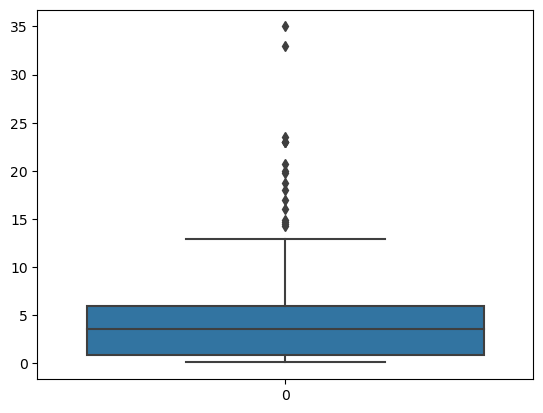

In [20]:
sns.boxplot(car_dataset['Selling_Price'])

In [21]:
sorted(car_dataset['Selling_Price'],reverse=True)
#DISPLAYS DATA IN DECENDING ORDER

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [22]:
(car_dataset['Selling_Price']>=33.0) & (car_dataset['Selling_Price']<=35.0)

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Name: Selling_Price, Length: 301, dtype: bool

In [23]:
#PASSING BOOLEAN VALUES TO DATA FRAME
car_dataset[(car_dataset['Selling_Price']>=33.0) & (car_dataset['Selling_Price']<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [24]:
#tild sign will print others rows leaving the selected rows
car_dataset[~(car_dataset['Selling_Price']>=33.0) & (car_dataset['Selling_Price']<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [25]:
#MODIFY EXISTING DATA FRAME
car_dataset= car_dataset[~(car_dataset['Selling_Price']>=33.0) & (car_dataset['Selling_Price']<=35.0)]

In [26]:
car_dataset.shape

(299, 9)

ENCODING CATEGORICAL DATA

In [27]:
# Distribution of Data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [28]:
car_dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [29]:
# Fuel_Type
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Seller_Type
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Transmission
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


STORE FEATURE MATRIX IN X AND RESPONSE (TARGET) MATRIX IN VECTOR Y

In [31]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)#INDEPENDENT VARIABLES
Y = car_dataset['Selling_Price']#TARGET VARIABLE

In [32]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,8
297,5.90,60000,0,0,0,0,9
298,11.00,87934,0,0,0,0,15
299,12.50,9000,1,0,0,0,7


In [33]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

Splitting the Data into Training and Test Data

In [34]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [35]:
print(X)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          0            0             0      0   
1             9.54       43000          1            0             0      0   
2             9.85        6900          0            0             0      0   
3             4.15        5200          0            0             0      0   
4             6.87       42450          1            0             0      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            0             0      0   
297           5.90       60000          0            0             0      0   
298          11.00       87934          0            0             0      0   
299          12.50        9000          1            0             0      0   
300           5.90        5464          0            0             0      0   

     Age  
0     10  
1     11  
2      7  
3     1

Target Values

In [36]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


Training and Test Data

In [37]:
#Traing data in X_train
#Testin Data in X_train
#Price value of X_train in Y_train
#Price value of X_test in Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
#0.1% Data = 10% Data is Testing Data
#90% Data is Training Data

IMPORT MODELS
OUR TARGET COLUMN(SELLING PRICE) CONTAINS COUNTINOUS VALUES...SO,IT IS A REGRESSION PROBLEM

IMPORT THE MODELS


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 

MODEL TRAINING

In [39]:
lr = LinearRegression()#lr is instance of linearRegression    
lr.fit(X_train,Y_train)

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

xg = XGBRegressor()
xg.fit(X_train,Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

GradientBoostingRegressor()

PREDICTION ON TEST DATA

In [40]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = rf.predict(X_test)
Y_pred3 = xgb.predict(X_test)
Y_pred4 = xg.predict(X_test)

EVALUATING THE ALGORITHM

R SQARED VALUE IS A VERY IMP METRIC TO EVALUATE THE PERFORMANCE OF A REGRESSTION BASED ML MODELS

In [41]:
#THE MORE THE VALUE OF R SQARED(NEAR TO 1.0)THE BEST THE MODEL IS
from sklearn import metrics

In [42]:
score1 = metrics.r2_score(Y_test,Y_pred1)#ACTUAL VALUE,PREDICTED VALUES
score2 = metrics.r2_score(Y_test,Y_pred2)#ACTUAL VALUE,PREDICTED VALUES
score3 = metrics.r2_score(Y_test,Y_pred3)#ACTUAL VALUE,PREDICTED VALUES
score4 = metrics.r2_score(Y_test,Y_pred4)#ACTUAL VALUE,PREDICTED VALUES

In [43]:
print(score1,score2,score3,score4)

0.6790884983129404 0.736349297686095 0.8683712100083012 0.8887471822279068


In [44]:
#CREATING PANDAS DATAFRAME AND USING PYTHON DICTIONARY
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
              'R2_SCORE':[score1,score2,score3,score4]})

In [45]:
final_data

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.736349
2,GBR,0.868371
3,XG,0.888747


<Axes: xlabel='Models', ylabel='R2_SCORE'>

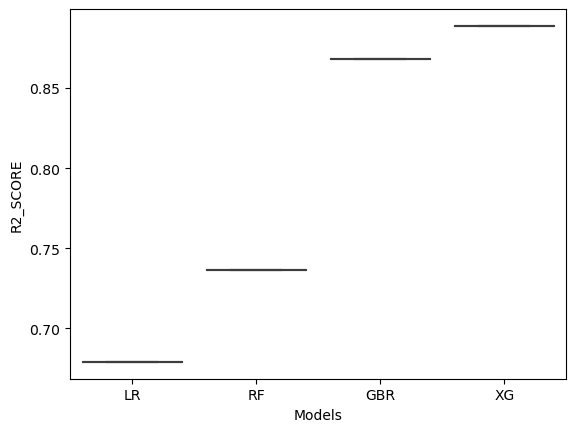

In [46]:
sns.boxplot(x='Models',y='R2_SCORE',data=final_data)

SAVE THE MODEL

In [47]:
xg = XGBRegressor()
xg_final = xg.fit(X,Y)#train the best model on entire data set

In [48]:
import joblib

In [49]:
joblib.dump(xg_final,'Car_Bazaar')

['Car_Bazaar']

In [50]:
model = joblib.load('Car_Bazaar')

PREDICTION ON NEW DATA

In [51]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':0
},index=[0])

In [52]:
model.predict(data_new)

array([3.630374], dtype=float32)

GUI

In [53]:
# from tkinter import *
# import joblib

# def show_entry_feilds():
#     p1=float(e1.get())
#     p2=float(e2.get())
#     p3=float(e3.get())
#     p4=float(e4.get())
#     p5=float(e5.get())
#     p6=float(e6.get())
#     p7=float(e7.get())

#     model = joblib.load('Car_Bazaar')
#     data_new = pd.DataFrame({
#         'Present_Price':p1,
#         'Kms_Driven':p2,
#         'Fuel_Type':p3,
#         'Seller_Type':p4,
#         'Transmission':p5,
#         'Owner':p6,
#         'Age':p7
#     },index=[0])

#     result = model.predict(data_new)
#     Label(master,text="Car Purchase Amount").grid(row=8)
#     Label(master,text=result).grid(row=10)
#     print("Car Purchase Amount",result[0])

# master =Tk()
# master.title("Car Price Prediction Using Machine Learning")
# label = Label(master,text="Car Price Prediction Using Machine Learning",bg="black",fg="white").grid(row=0,columnspan=2)

# Label(master, text="Present_Price").grid(row=1)
# Label(master, text="Kms_Driven").grid(row=2)
# Label(master, text="Fuel_Type").grid(row=3)
# Label(master, text="Seller_Type").grid(row=4)
# Label(master, text="Transmission").grid(row=5)
# Label(master, text="Owner").grid(row=6)
# Label(master, text="Age").grid(row=7)

# e1 = Entry(master)
# e2 = Entry(master)
# e3 = Entry(master)
# e4 = Entry(master)
# e5 = Entry(master)
# e6 = Entry(master)
# e7 = Entry(master)

# e1.grid(row=1,column=1)
# e2.grid(row=2,column=1)
# e3.grid(row=3,column=1)
# e4.grid(row=4,column=1)
# e5.grid(row=5,column=1)
# e6.grid(row=6,column=1)
# e7.grid(row=7,column=1)

# Button(master,text='PREDICT',command=show_entry_feilds).grid()

# mainloop()


A1 CAR BAZAAR


In [54]:
# from tkinter import *
# root=Tk()

# root.geometry("644x344")

# def new():
#     new=Toplevel(root)
#     new.geometry("644x344")
#     new.title("CAR BAZAAR")
#     new.config(bg="#FFE4C4")
#     Label(new,text="CAR BAZAAR",font="italic 20 bold",pady=30,padx=50,bg="#FFE4C4").grid(row=0,column=0)
    

#     def show_entry_feilds():
#         p1=float(e1.get())
#         p2=float(e2.get())
#         p3=float(e3.get())
#         p4=float(e4.get())
#         p5=float(e5.get())
#         p6=float(e6.get())
#         p7=float(e7.get())

#         model = joblib.load('Car_Bazaar')
#         data_new = pd.DataFrame({
#             'Present_Price':p1,
#             'Kms_Driven':p2,
#             'Fuel_Type':p3,
#             'Seller_Type':p4,
#             'Transmission':p5,
#             'Owner':p6,
#             'Age':p7
#         },index=[0])

#         result = model.predict(data_new)
#         Label(new,text="Car Purchase Amount").grid(row=9)
#         Label(new,text=result).grid(row=11)
#         print("Car Purchase Amount : ",result[0])

#     # master =Tk()
#     # master.title("Car Price Prediction Using Machine Learning")
#     # label = Label(master,text="Car Price Prediction Using Machine Learning",bg="black",fg="white").grid(row=0,columnspan=2)

#     Label(new, text="Present_Price",bg="#FFE4C4").grid(row=1,column=0)
#     Label(new, text="Kms_Driven",bg="#FFE4C4").grid(row=2,column=0)
#     Label(new, text="Fuel_Type",bg="#FFE4C4").grid(row=3,column=0)
#     Label(new, text="Seller_Type",bg="#FFE4C4").grid(row=4,column=0)
#     Label(new, text="Transmission",bg="#FFE4C4").grid(row=5,column=0)
#     Label(new, text="Owner",bg="#FFE4C4").grid(row=6,column=0)
#     Label(new, text="Age",bg="#FFE4C4").grid(row=7,column=0)

#     e1 = Entry(new).grid(row=1,column=1)
#     e2 = Entry(new).grid(row=2,column=1)
#     e3 = Entry(new).grid(row=3,column=1)
#     e4 = Entry(new).grid(row=4,column=1)
#     e5 = Entry(new).grid(row=5,column=1)
#     e6 = Entry(new).grid(row=6,column=1)
#     e7 = Entry(new).grid(row=7,column=1)

#     Button(new,text='PREDICT',command=show_entry_feilds).grid()



# # image1 = Image("C:\Users\Tanveer Singh\Desktop\images\red car.png")
# # img = ImageTk.PhotoImage(Image.open("red_car.jpg"))
# # Label(root, image = img).grid(row=0,column=7)

# # photo = PhotoImage(file = "C:\Users\Tanveer Singh\Desktop\images\red car.png")
# # photo = photo.subsample(2)
# # lbl = Label(root,image = photo)
# # lbl.image = photo
# # lbl.grid(column=7, row=0)


# root.title("CAR BAZAAR")
# root.config(bg='#00FFFF')
# root.resizable(0,0)
# Label(root,text="A1 CAR BAZAAR",font="Arial 18 bold ",pady=30,padx=225,fg="blue",bg="skyblue",relief=RIDGE).grid(row=0,column=5)
# Label(root,text="Want To Find Out The BEST Selling Price Of Your Used Car ?",font="BerlinSansFBDemi 13 bold",padx=5,pady=20,bg="#00FFFF").grid(row=1,column=5)
# Label(root,text=" ",padx=5,pady=25,bg='#00FFFF').grid(row=2,column=5)
# Button(text="LEST GO!!!",font="ArialBlack 15 bold",padx=10,pady=20,relief=RIDGE,bg="#F0FFFF",fg="red",command=new).grid(row=5,column=5)


# root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Tanveer Singh\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Tanveer Singh\AppData\Local\Temp\ipykernel_7400\1911471975.py", line 15, in show_entry_feilds
    p1=float(e1.get())
AttributeError: 'NoneType' object has no attribute 'get'


In [55]:
from PIL import ImageTk, Image 

1. Linear Regression Model

In [56]:
#Loading the Linear Regression Model
lin_reg_model = LinearRegression()

In [57]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [58]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [59]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)
#Error score should be as low as possible

R Squared Error :  0.9047292287994998


Visualize the Actual and Predicted Prices

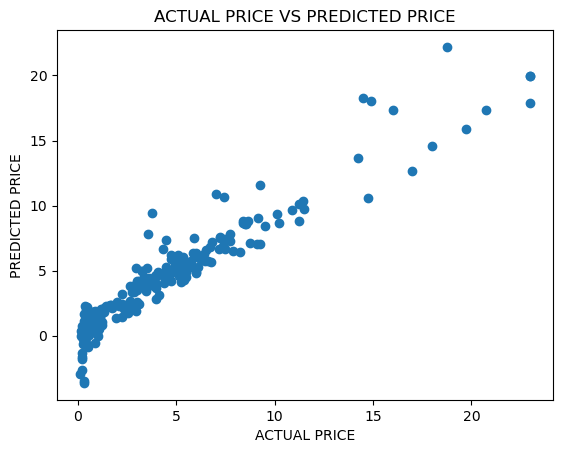

In [60]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.show()

In [61]:
# Prediction on Testing Data
test_data_prediction = lin_reg_model.predict(X_test)

In [62]:
# R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.6790884983129404


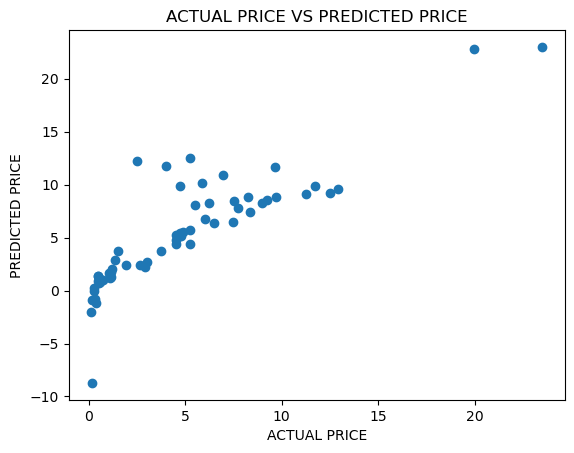

In [63]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.show()

2. Lasso Regression Model

In [64]:
#Loading the Lasso Regression Model
lass_reg_model = Lasso()

In [65]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [66]:
# Prediction on Training Data
training_data_prediction = lass_reg_model.predict(X_train)

In [67]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)
#Error score should be as low as possible

R Squared Error :  0.8891727864253018


Visualize the Actual and Predicted Prices

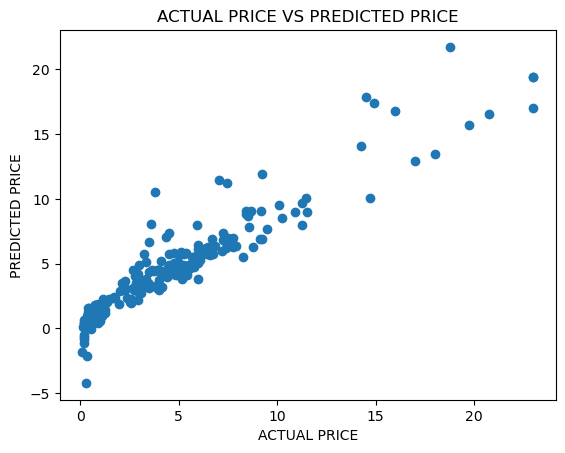

In [68]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.show()

In [69]:
# Prediction on Testing Data
test_data_prediction = lass_reg_model.predict(X_test)

In [70]:
# R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.5969011688545307


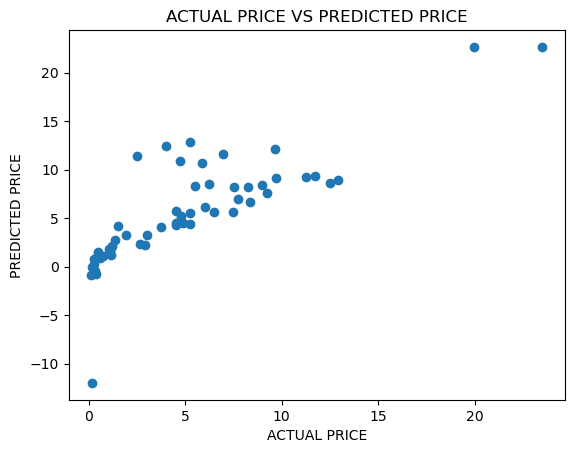

In [71]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.show()